# Data Set

[Suicide Rates Overview 1985 to 2016](https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016#) disponível no kaggle e tendo como inspiração a prevensão ao suicidio, este dataset compila informações de quatro outros dataset, vinculados por tempo e local de fontes como UN, World Bank and World Health Organization, e tem por objetivo encontrar sinais correlacionados ao aumento das taxas de suicidio entre diferentes recortes do mundo, dentre todo o espectro socioeconomico.

__Features:__<br><br>
* Country <br><br>
* Year: Ano(1985 a 2016)<br><br>
* Sex <br><br>
* Age: Idade em intervalo([5,14], [15,24], [25,34], [35,54], [55,74] e +75) <br><br>
* Suicides-no: Numero de suicidios<br><br>
* Population<br><br>
* Suicidade/100k pop: Suicidios por 100k habitantes<br><br>
* Country-Year: País e o ano na mesma variável<br><br>
* HDI for year: Indice de Desenvolvimento Humano (IDH ou HDI) por ano<br><br>
* Gdp for year (\$): Produto Interno Bruto(PIB) do ano<br><br>
* Gdp per capita(\$): Produto interno Bruto(PIB) dividido pelo total da população<br><br>
* Generation: Geração na qual nasceram(G.I. Generation(1900-1927), Silent(1928-1945), Boomers(1946-1964), Generation X(1965-1980), Millenials(1981-1996), Generation Z(1997-2010))

In [1]:
#Libs
import pandas as pd
import numpy as np

#Suicidade Data
suicides = pd.read_csv("./suicide-rates-overview-1985-to-2016/master.csv")
print(suicides.shape)
suicides.head()

(27820, 12)


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


# Analise e Limpeza

In [2]:
suicides.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [3]:
suicides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


__Distribuição dos suicidios por pais__

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
#plt.style.use('ggplot')
sns.axes_style("dark")
sns.set_style("darkgrid")
%matplotlib inline

In [56]:
#Criando  dataframe com o numero de suicidios totais por pais de 85 a 2016
suicidesNO = []
for country in suicides.country.unique():
    suicidesNO.append(sum(suicides[suicides['country'] == country].suicides_no))

suicidesNO = pd.DataFrame(suicidesNO, columns=['suicidesNO'])
country= pd.DataFrame(suicides.country.unique(), columns=['country'])
country_suicidesNO = pd.concat([suicidesNO, country], axis=1)
country_suicidesNO = country_suicidesNO.sort_values(by='suicidesNO', ascending=False)
#country_suicidesNO

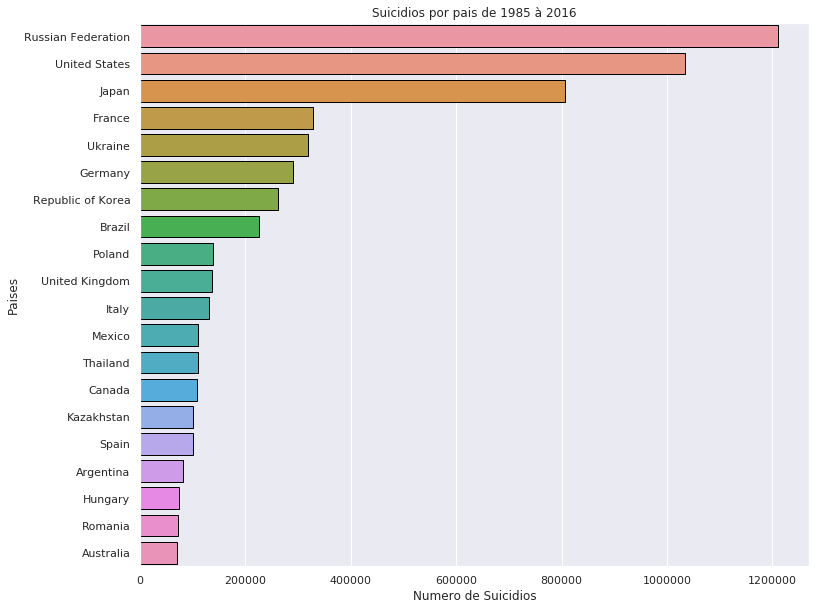

In [57]:
#plot
plt.figure(figsize=(12,10))
g = sns.barplot(country_suicidesNO['suicidesNO'][:20], country_suicidesNO['country'][:20], edgecolor='black')
plt.title('Suicidios por pais de 1985 à 2016')
g.set(xlabel='Numero de Suicidios', ylabel='Paises')
plt.show()

In [58]:
#Dropando features q não serão usadas e com NAN
del suicides['HDI for year']
del suicides['country-year']

In [59]:
#Country ISO code
iso_country_map = pd.read_csv('./wikipedia-iso-country-codes.csv')
iso_country_map = iso_country_map.rename(columns = {'English short name lower case':'country'})
#iso_country_map.head()

#Country Continent file
concap = pd.read_csv('./countryContinent.csv', encoding = 'iso-8859-1')[['code_3', 'continent', 'sub_region']]
concap = concap.rename(columns = {'code_3':"Alpha-3 code"})
#concap.head()

In [60]:
#Alterando alguns nomes de paises
correct_names = {'Cabo Verde': 'Cape Verde', 'Macau': 'Macao', 'Republic of Korea': "Korea, Democratic People's Republic of" , 
 'Russian Federation': 'Russia',
 'Saint Vincent and Grenadines':'Saint Vincent and the Grenadines' 
 , 'United States': 'United States Of America'}

def correct_country(x):
    if x in correct_names:
        return correct_names[x]
    else:
        return x
    
suicides['country'] = suicides['country'].apply(lambda x: correct_country(x))

In [61]:
#Merge
suicides = pd.merge(suicides, iso_country_map, on='country', how='left')
suicides = pd.merge(suicides,concap,on='Alpha-3 code',how='left')
#suicides.head()

In [62]:
#new feature
suicides['gdp'] = suicides['gdp_per_capita ($)'] * suicides['population']
#suicides.head()

In [63]:
#Agrupando por continent
suicides_gby_Continent = suicides.groupby(['continent', 'sex', 'year']).aggregate(np.sum).reset_index()
#suicides_gby_Continent.head()

suicides_gby_Continent['gdp_per_capita ($)'] = suicides_gby_Continent['gdp'] / suicides_gby_Continent['population']
#suicides_gby_Continent.head()

suicides_gby_Continent['suicides/100k pop'] = suicides_gby_Continent['suicides_no'] * 1000/suicides_gby_Continent['population']
#suicides_gby_Continent.head()

#Dados de 2016 não estão completos
suicides_gby_Continent = suicides_gby_Continent[suicides_gby_Continent['year'] != 2016]
suicides_gby_Continent.head()

,continent,sex,year,suicides_no,population,suicides/100k pop,gdp_per_capita ($),Numeric code,gdp
0,Africa,female,1985,37,470300,0.078673,1328.206889,7020.0,624655700
1,Africa,female,1986,8,478100,0.016733,1755.988496,7020.0,839538100
2,Africa,female,1987,53,487000,0.108830,2205.994251,7020.0,1074319200
3,Africa,female,1988,56,464900,0.120456,2317.000000,2880.0,1077173300
4,Africa,female,1989,37,470000,0.078723,2349.000000,2880.0,1104030000


# Visualizações com Plotly Express

In [64]:
import plotly_express as px

In [65]:
#Teste com um scatter plot
suicides_gby_Continent_2007 = suicides_gby_Continent[suicides_gby_Continent['year']==2007]

#plot
#fig = px.scatter(suicides_gby_Continent_2007,x = 'suicides/100k pop', y = 'gdp_per_capita ($)')

#Melhorando o plot adicionando mais features
"""
color: add cores apartir da coluna especificada
width, heigth: proporção
size: tamanho dos pontos de acordo com a coluna especificada
"""
fig = px.scatter(suicides_gby_Continent_2007,x = 'suicides/100k pop', y = 'gdp_per_capita ($)', 
                 color='continent', width=800, height=500, size ='suicides/100k pop')

fig.show()

Há dois pontos para cada continente, por que temos dados para Homens e mulheres, é possível especificar isto no graficos, vejamos duas maneiras:

In [15]:
#Primeira maneira: com symbol, simbolos diferentes para cada sexo
fig = px.scatter(suicides_gby_Continent_2007,x = 'suicides/100k pop', y = 'gdp_per_capita ($)', 
                 color='continent', width=800, height=500, size ='suicides/100k pop', 
                 symbol='sex')

fig.show()


In [16]:
#Segunda Maneira: com facets, facetas diferentes para cada sexo
fig = px.scatter(suicides_gby_Continent_2007,x = 'suicides/100k pop', y = 'gdp_per_capita ($)', 
                 color='continent', width=800, height=500, size ='suicides/100k pop', 
                 facet_col='sex')

fig.show()

Podemos notar um disparidade grande entre a taxa de suicidios entre homens e mulheres, além disso a renda per capita não parece influenciar diretamente a taxa de suicidios dos continentes, pelo menos do quesito entre homens e mulheres

# Animando os graficos

Usaremos 4 paramentros basicamente:
* animation_frame: especifica a dimensão da nossa animação
* animation_group: especifica os dados (a coluna) que serão animados
* range_x e range_y: range dos valores de x e y
* text: labels dos continentes para todos os pontos, para uma visualização melhor

In [17]:
fig = px.scatter(suicides_gby_Continent,x = 'suicides/100k pop', y = 'gdp_per_capita ($)', 
                 color='continent', width=900, height=500, size ='suicides/100k pop', 
                 symbol='sex', animation_frame='year', animation_group='continent', 
                 range_x=[0,0.4], range_y=[0,70000], text='continent')

fig.show()

Podemos notar que:
* De 1991-2001 a taxa de suicidio entre homens europeus foi bem alta
* Oceania apesar de desde 1985 ja possuir um PIB alto, e que cresceu bastante ao longo do tempo, sempre esteve bastante suscetível a suicidios
* Africa possui taxas baixas de suicidio, assim como de PIB talvez por que há outras causas de mortes?
* No continente Americano a taxa de suicidio cresceu gradualmente

# Function Standardization

Vamos analisar o por que a taxa de suicidios entre homens Europeus é tão alta

In [18]:
european_suicide_data = suicides[suicides['continent']== 'Europe']
european_suicide_data_gby = european_suicide_data.groupby(['age', 'sex', 'year']).aggregate(np.sum).reset_index()
#european_suicide_data_gby.head()

In [19]:
european_suicide_data_gby['suicides/100k pop'] = european_suicide_data_gby['suicides_no'] * \
                                                    1000/european_suicide_data_gby['population']
    
#european_suicide_data_gby.head()

__Animate Bar Chart__

In [20]:
fig = px.bar(european_suicide_data_gby, x='age', y='suicides/100k pop', facet_col='sex', animation_frame='year', 
             animation_group='age', category_orders={'age':['5-14 years', '15-24 years', '25-34 years', 
                                                            '35-54 years', '55-74 years', '75+ years']}, 
             range_y=[0,1], width=900, height=500)

fig.show()

## Como a taxa de suicidio diminui usando um mapa

In [21]:
#dados para o mapa
suicides_map = suicides.groupby(['year', 'country', 'Alpha-3 code']).aggregate(np.sum).reset_index() \
                [['country','Alpha-3 code','suicides_no','population','year']]

#Add suicides/100k
suicides_map['suicides/100k pop'] = suicides_map['suicides_no'] * 1000/suicides_map['population']
suicides_map.head()

,country,Alpha-3 code,suicides_no,population,year,suicides/100k pop
0,Antigua and Barbuda,ATG,0,62574,1985,0.000000
1,Argentina,ARG,1988,27090800,1985,0.073383
2,Australia,AUS,1861,14562500,1985,0.127794
3,Austria,AUT,2091,7110115,1985,0.294088
4,Bahamas,BHS,1,203700,1985,0.004909


In [22]:
#plot
fig = px.choropleth(suicides_map, locations='Alpha-3 code', color='suicides/100k pop', hover_name='country', 
                    animation_frame='year', color_continuous_scale=px.colors.sequential.Plasma, 
                     width=900, height=500)

fig.show()

Podemos ter uma noção sobre nossos dados apartir deste grafico

* Muitos paises estão faltando
* Africa possui poucos paises nos dados
* A maioria dos dados da Asia esta faltando